# Importando bibliotecas

In [22]:
# biblioteca para computação científica
import numpy as np
# biblioteca para aprendizado de máquina
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Consumindo Dataset e transoformando-os em Tensor para visualização.

In [26]:
transform = transforms.ToTensor() # Definindo a conversão de imagns para tensor

trainset = datasets.MNIST('./MNIST_data', download=True, train=True, transform=transform) # Carrega a parte do treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) # Carregar a parte de validação
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados

# Carregando conjuntos de Tensor de imagens

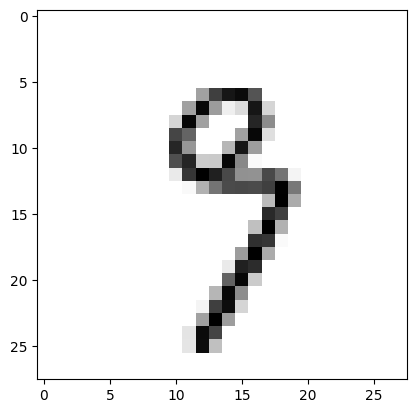

In [34]:
# Carrega uma imagem derivada do treinamento
dataiter = iter(trainloader)
# Chamando conjunto de imagens plotando a imagem
imagens, etiquetas = dataiter.__next__()
# Exibindo Visualização
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

# Conferindo tamanho do Tensor que repesenta a imagem

In [35]:
print(imagens[0].shape) # Para eriicar as dimensões do tensor de cada imagem
print(etiquetas[0].shape) # Para verificar as dimensões do tensor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


# Código alternativo para carregar dataset do MNIST e visualizar imagens

torch.Size([64, 1, 28, 28])


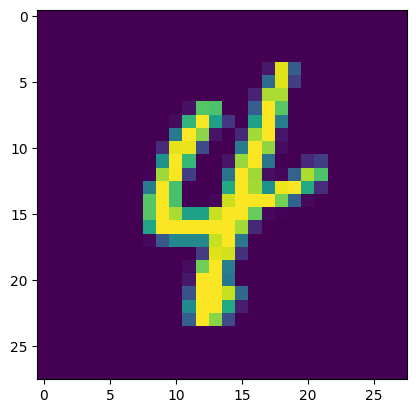

In [7]:
import torch
from torchvision import datasets, transforms

# Carregar o conjunto de dados MNIST
train_data = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
)

# Definir o tamanho do lote
batch_size = 64

# Criar um carregador de dados
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True
)

# Visualizar as imagens
for images, labels in train_loader:
    print(images.shape)
    plt.imshow(images[0].permute(1, 2, 0))
    plt.show()
    break


# Criando estrutura de Rede Neural a partir de um modelo
### Modelo [Keira Xception](https://keras.io/api/applications/xception/)

In [47]:
class Modelo(nn.Module):
    def __init__(self):
      super(Modelo, self). __init__()
      self.linear1 = nn.Linear(28*28, 229) # Camada de entrada, 784 neurônios que se ligam a 128
      self.linear2 = nn.Linear(128, 64)  # Camada interna,1, 128 neurônios que se ligam a 64
      self.linear3 = nn.Linear(64, 10)  # Camada interna,3, 128 neurônios que se ligam a 64
      # Para a acamada de saída não é necessário definir nada pois ó spreciamos peegar o output da camada interna 2

    def dorwar(self,x):
      x = F.relu(self.linear1(X)) # função de ativação de camada de entrada para a camada interna 1
      x = F.relu(self.linear2(X)) # função de ativação de camada interna 1 para a camada interna 2
      x = self.linear(self.linear2(X)) # função de ativação de camada interna 2 para a camada de saída, nesse caso f(x) = x
      return F.log_softmax(x, dim=1) # dados utilizados para calcular a perda

# Definindo Treino da Rede Neural

In [42]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(),lr=0.1, momentum=0.5) # Define a política de atualização dos pesos
  inicio = time() # Timer para sabermos quanto tempo levou no treino

  criterio = nn.NLLLoss() # Definnindo o criterio para calcular a perda
  EPOCHS = 10 # Numero de épocas que o algoritmo rodará
  modelo.train() # ativando o modo de treinamento de modelo

  for epoch in range(EPOCHS):
    perda_acumulada = 0 # Inicialização da perda acumulada da epoch em questão

    for imagens, etiquetas in trainloader:
      imagens = imagens.view(imagens.shape[0], -1) # Convertendo as imagens para "vetores" de 28*28 casas para ficarem compatíveis com o treino
      otimizador.zero_grad() # Zerando os gradientes por conta do ciclo anterior

      output = modelo(imagens.to(device)) # Colocando os dados no modelo
      perda_instantanea = criterio(output, etiquetas.to(device)) # Calculando a perda da epoch em questão

      perda_instantanea_backwar() # back propagation a partir da perda

      otimizador.stop() # Atualizando os pesos e bias

      perda_acumulada += perda_instantanea.item() # Atualizando a perda acumulada

    else:
      print("Epoch {} - Perda resultante {}".format(epoch+1, perda_acumulada/len(trainloader)))
  print("\nTempo de treino (em minutos) =",(time()-inicio/60))

# Trabalhando modelo de Validação
>- Mostra quantidade de imagem pesquisada
>- Precisão do modelo

Compara uma imagem não treinada com a rede e seus pesos, analisandoa respota da rede para verificar aprendizado

In [41]:
def validacao(modelo, valloade, device):
  conta_corretas, contas_todas = 0, 0

  for imagens, etiquetas in valloader:
    img = imagns[i].view(1, 784)
    # Desativar o autograd para acelerar a validação: Grafo computacionais dinâmicos tem um custo alto em processamento
    with torch.no_grad():
      logps = modelo(img.to(device)) # Output do modelo em escala logaritmica

    ps = torch.exp(logps) # Converte output para escala normal ( lembrando que é um tensor )
    probab = list(ps.cpu().numpy()[0])
    etiqueta_pred = probab.index(max(probab)) # Converte o tensor em um número, no caso, o npumero que o modelo previu
    etiquea_certa = etiquetas.numpy()[i]
    if(etiqueta_certa == etiqueta_pred): # compara a previsão com o valor correto
      conta_correta += 1
    conta_todas += 1

  print("Total de imagens testadas é", contas_todas)
  print("\nPrecisão do modelo (%)".format(conta_corretas*100/conta_todas))

#Chamando modelo para execução

In [48]:
modelo = Modelo() # Iniciando modelo

# Definindo Dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else "cpu") # verificando se existe a placa cuda na GPU, caso não exista executa na CPU
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=229, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)